## Sherlock illustration
### To run this notebook, please [follow the instructions](https://lasair-lsst.readthedocs.io/en/main/core_functions/python-notebooks.html) or else it won`t work.
The instructions are at https://lasair-lsst.readthedocs.io/en/main/core_functions/python-notebooks.html

In this notebook, we use the Lasair API to invoke Sherlock, 
to find the likely host galaxy if there were an alert there. It shows how there can be
multiple possible matches, including repeats, but Sherlock chooses the best one.

*IMPORTANT*: this notebook is to explain how Sherlock works. Lasair computes the Sherlock
crossmatch for every alert anyway, so you need not call the API, but rather use the
table supplied in the filter builder.

In [2]:
import sys
sys.path.append('../API_lsst')
import json, settings
from IPython.display import Image, HTML, display
import lasair

In [3]:
# the lasair client will be used for fetching Sherlock data
L = lasair.lasair_client(settings.API_TOKEN, endpoint='https://api.lasair.lsst.ac.uk/api')

In [4]:
# Carefully chosen sky point near four galaxies
ra = 295.744446
de = 12.083441

In [5]:
# If `lite=True` (the default), you just get the best guess rather than all possible crossmatches
sherl = L.sherlock_position(ra, de, lite=False)
print(json.dumps(sherl, indent=2))

{
  "classifications": {
    "query0": [
      "SN",
      "The transient is possibly associated with <em>122502957442430077</em>; a G=19.26 mag galaxy found in the PS1/GAIA catalogues. It's located 1.61\" N, 0.65\" E from the galaxy centre."
    ]
  },
  "crossmatches": [
    {
      "G": 19.2577,
      "_g": 19.582300186157227,
      "_gErr": 0.011051000095903873,
      "_i": 18.522600173950195,
      "_iErr": 0.004778000060468912,
      "_r": 18.901899337768555,
      "_rErr": 0.005638999864459038,
      "_y": 18.451099395751953,
      "_yErr": 0.0205719992518425,
      "_z": 18.525299072265625,
      "_zErr": 0.008453000336885452,
      "association_type": "SN",
      "best_distance": null,
      "best_distance_flag": null,
      "best_distance_source": null,
      "catalogue_object_id": "122502957442430077",
      "catalogue_object_subtype": "multiple",
      "catalogue_object_type": "galaxy",
      "catalogue_table_id": 80,
      "catalogue_table_name": "PS1/GAIA",
      "catalog

### All the crossmatches
First is sherlock's opinion of this match (lower rank is better), 
then the delta position in arcseconds from the given position,
then the catalogue from which the object came.

In [6]:
for cm in sherl['crossmatches']:
    print('%4s ' % str(cm['merged_rank']), end='')
    print(cm['eastSeparationArcsec']+'  ', end='')
    print(cm['northSeparationArcsec']+'  ', end='')
    print(cm['catalogue_table_name'])  

None -0.6475  -1.6092  PS1/GAIA
   1 -0.6475  -1.6092  PanSTARRS DR1
   1 -0.5814  -1.4942  Gaia DR3
   1 -0.9773  -2.0149  Gaia DR3


Clearly there are repeated catalogue entries. You can see that the GAIA/PS1 and Gaia DR2 are in the same place,
and the names overlap, so they are clealy the same content copied over. If we remove such duplicates, we get:
```
1   -0.5819  -1.4912  GAIA/PS1 and Gaia DR2 and PanSTARRS DR1
2   -4.6041   5.8119  PS1 and PanSTARRS DR1
3   -1.5777   7.8781  PS1 and PanSTARRS DR1
4    2.0689  -8.6321  PS1 and PanSTARRS DR1
```

### The Chosen One
These four objects are shown in the picture below, the location of the alert (RA and Dec above) is the red circle,
and the four galaxies are shown. Sherlock has chosen the one marked with the green square (rank=1) as the most likely host.

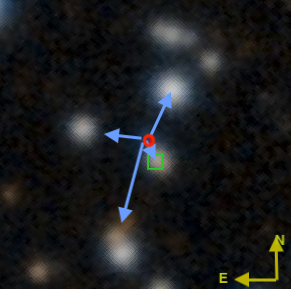

In [7]:
display(HTML('<h2><a href="https://lasair-ztf.lsst.ac.uk/objects/ZTF18abkwpdk/">ZTF18abkwpdk</a></h2>'))
display(Image(filename='image/ZTF18abkwpdk_ann.png'))